## Visual story telling part 1: green buildings

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('greenbuildings.csv')
df

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


We are recreating the analysis of the "Excel guru" to do make sure she did not miss anything.

First, let's cut the same outliers as she did.

In [5]:
mask = (df['leasing_rate'] >= 0.1)
filtered_data = df[mask]
filtered_data

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


But why did she use 10% as the cutoff? This number seems a bit arbitrary.

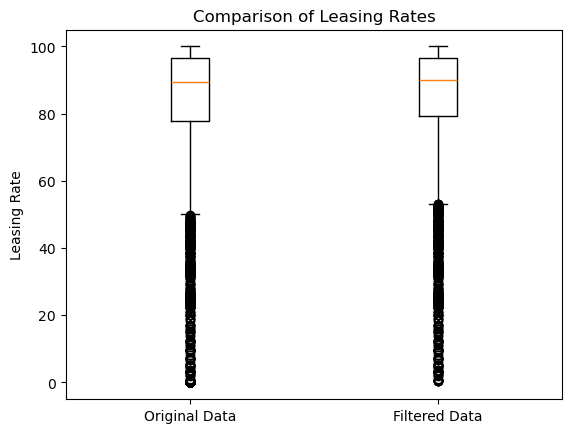

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.boxplot([df['leasing_rate'], filtered_data['leasing_rate']], labels=['Original Data', 'Filtered Data'])

ax.set_title('Comparison of Leasing Rates')
ax.set_ylabel('Leasing Rate')

plt.show()

As we can see from the graph, 10% cutoff doesn't have much of the effect on the data. If the goal was to remove outliers from the analysis, she could have used 55% cutoff. But for now we're just following her steps.

The code below is how she found the medians for both types of buildings.

In [9]:
green_buildings = filtered_data[filtered_data['green_rating'] == 1]
non_green_buildings = filtered_data[filtered_data['green_rating'] == 0]


med_green = np.median(green_buildings['Rent'])
med_non_green = np.median(non_green_buildings['Rent'])
print("Median Rent for Green Buildings:", med_green)
print("Median Rent for Non-Green Buildings:", med_non_green)

Median Rent for Green Buildings: 27.6
Median Rent for Non-Green Buildings: 25.0


In her work, she substracted the median rents (27.6-25 = 2.6) to get the additional profit per sqft for having a green building.

We were unsure whether it was appropriate to directly compare medians for two subsets, so we did some exploratory analysis below.

In [11]:
print("Median Rent for Green Buildings:", med_green)
print("Median Rent for Non-Green Buildings:", med_non_green)
print("Standard Deviation of Rent for Green Buildings:", np.std(green_buildings['Rent']))
print("Standard Deviation of Rent for Non-Green Buildings:", np.std(non_green_buildings['Rent']))
print("Number of Green Buildings:", len(green_buildings['Rent']))
print("Number of Non-Green Buildings:", len(non_green_buildings['Rent']))

Median Rent for Green Buildings: 27.6
Median Rent for Non-Green Buildings: 25.0
Standard Deviation of Rent for Green Buildings: 12.945978129711223
Standard Deviation of Rent for Non-Green Buildings: 15.29253320525446
Number of Green Buildings: 684
Number of Non-Green Buildings: 7050


As you can see, we may not compare "raw" median values for rent of green and non-green buildings due to different sample sizes (685 vs 7209). In other words, the difference in sample may cause bias (uncertainty about the true median). We need to construct confidence intervals for both types of buildings to see whether they overlap.

In [13]:
std_green = np.std(green_buildings['Rent'])
std_nongreen = np.std(non_green_buildings['Rent'])
n_green = len(green_buildings['Rent'])
n_nongreen = len(non_green_buildings['Rent'])
z1 = 1.96 # using 95% confidence level
z2 = 3.29 # using 99.9% confidence level
def confidence_intervals(med, z, s, n):
    upper_level = med + z * (s/np.sqrt(n))
    lower_level = med - z * (s/np.sqrt(n))
    ci_vals = [lower_level, upper_level]
    return ci_vals
ci_green = confidence_intervals(med_green, z2, std_green, n_green)
ci_nongreen = confidence_intervals(med_non_green, z2, std_nongreen, n_nongreen)
print("CI Green Buildings: " + str(ci_green))
print("CI Non Green Buildings: " + str(ci_nongreen))

CI Green Buildings: [25.971443928140534, 29.22855607185947]
CI Non Green Buildings: [24.400787628113225, 25.599212371886775]


As you can see, even at 99.9% confidence interval, rents per sqft do not overlap. This is an extremely important point, because statistically they are not the same, and we can say that with 99.9% confidence.

Given these confidence intervals, we can calculate where the true difference in means would lie. To do that, we need to see best and worst case scenarios.

In [15]:
worst_case = ci_green[0] - ci_nongreen[1]
best_case = ci_green[1] - ci_nongreen[0]
print(f"In worst-case scenario, we are 99.9% sure that green buildings will make at least ${worst_case:,.2f} more per square foot.")
print(f"In best-case scenario, we are 99.9% sure that green buildings will make at least ${best_case:,.2f} more per square foot.")

In worst-case scenario, we are 99.9% sure that green buildings will make at least $0.37 more per square foot.
In best-case scenario, we are 99.9% sure that green buildings will make at least $4.83 more per square foot.


Given that our new building is going to be 250,000 sqft, we can calculate additional income per year.

In [17]:
worst_profit = 250000 * worst_case
best_profit = 250000 * best_case
print(f"In worst-case scenario, we are 99.9% sure that the given green project will make at least ${worst_profit:,.2f} more money per year.")
print(f"In best-case scenario, we are 99.9% sure that the given green project will make at least ${best_profit:,.2f} more money per year.")

In worst-case scenario, we are 99.9% sure that the given green project will make at least $93,057.89 more money per year.
In best-case scenario, we are 99.9% sure that the given green project will make at least $1,206,942.11 more money per year.


We can be sure that a green building will bring more income, yet we need to incorporate restrictions (i.e., length of payback period). Given that the building will be rented out for 30 years or more, 30 is our threshold here.

In [19]:
#5,000,000 is the investment cost calculated in the following way 100,000,000*5%
worst_payback = 5000000/worst_profit
best_payback = 5000000/best_profit
print(f"In the worst-case scenario, we are 99.9% sure that the payback period will be {worst_payback:,.2f} years.")
print(f"In the best-case scenario, we are 99.9% sure that the payback period will be {best_payback:,.2f} years.")

In the worst-case scenario, we are 99.9% sure that the payback period will be 53.73 years.
In the best-case scenario, we are 99.9% sure that the payback period will be 4.14 years.


Unfortunately, in the worst-case scenario, the building will recoup the initial investment in more than 30 years. So, we cannot be certain that having a green building is a good idea, right? No! Using 99.9% confidence level is suitable for high-stakes situations related to aerospace or health. In case of business, it is much more advisable to use 95% confidence level, as it controls for good balance between accuracy and practicality. 

Let's do the CIs again.

In [21]:
ci_green = confidence_intervals(med_green, z1, std_green, n_green)
ci_nongreen = confidence_intervals(med_non_green, z1, std_nongreen, n_nongreen)
print("CI Green Buildings: " + str(ci_green))
print("CI Non Green Buildings: " + str(ci_nongreen))

CI Green Buildings: [26.62979638272202, 28.570203617277983]
CI Non Green Buildings: [24.643022416748302, 25.356977583251698]


In [22]:
worst_case = ci_green[0] - ci_nongreen[1]
best_case = ci_green[1] - ci_nongreen[0]
print(f"In worst-case scenario, we are 95% sure that green buildings will make at least ${worst_case:,.2f} more per square foot.")
print(f"In best-case scenario, we are 95% sure that green buildings will make at least ${best_case:,.2f} more per square foot.")

In worst-case scenario, we are 95% sure that green buildings will make at least $1.27 more per square foot.
In best-case scenario, we are 95% sure that green buildings will make at least $3.93 more per square foot.


In [23]:
worst_profit = 250000 * worst_case
best_profit = 250000 * best_case
print(f"In worst-case scenario, we are 95% sure that the given green project will make at least ${worst_profit:,.2f} more money per year.")
print(f"In best-case scenario, we are 95% sure that the given green project will make at least ${best_profit:,.2f} more money per year.")

In worst-case scenario, we are 95% sure that the given green project will make at least $318,204.70 more money per year.
In best-case scenario, we are 95% sure that the given green project will make at least $981,795.30 more money per year.


In [24]:
#5,000,000 is the investment cost calculated in the following way 100,000,000*5%
worst_payback = 5000000/worst_profit
best_payback = 5000000/best_profit
print(f"In the worst-case scenario, we are 95% sure that the payback period will be {worst_payback:,.2f} years.")
print(f"In the best-case scenario, we are 95% sure that the payback period will be {best_payback:,.2f} years.")

In the worst-case scenario, we are 95% sure that the payback period will be 15.71 years.
In the best-case scenario, we are 95% sure that the payback period will be 5.09 years.


Now, we see very good and favorable metrics. They are a proof that, given that the building will be at least as successful as the typical green building, we can expect a good return on the decision to go green. And this is exactly how the "Excel guru" should have gone with her analysis: she sould have used proper statistical tools to back her findings.

Let's come back to our variables. Where does this difference in rents come from? Are there any confounding variables for rent & green rating? Let's explore.


To find the magnitude of the relationship between two variables while controlling for the effects of another variable, we can use partial correlations.

In [27]:
import pingouin

# Assuming df is your DataFrame
partial_corr_1 = df[df['green_rating'] == 1].pcorr().loc['Rent'].drop(['Rent',"green_rating"])
partial_corr_0 = df[df['green_rating'] == 0].pcorr().loc['Rent'].drop(['Rent',"green_rating"])
print(partial_corr_1)
print(partial_corr_0)

CS_PropertyID        0.028878
cluster              0.103932
size                 0.077121
empl_gr              0.054008
leasing_rate         0.065836
stories             -0.009280
age                  0.027773
renovated           -0.022349
class_a              0.013014
class_b             -0.005136
LEED                 0.029651
Energystar           0.002069
net                 -0.024217
amenities           -0.104999
cd_total_07         -0.069225
hd_total07           0.050335
total_dd_07         -0.048732
Precipitation        0.002731
Gas_Costs            0.014504
Electricity_Costs    0.006357
cluster_rent         0.804047
Name: Rent, dtype: float64
CS_PropertyID        0.020972
cluster              0.034287
size                 0.122759
empl_gr              0.015278
leasing_rate         0.013044
stories             -0.017032
age                 -0.017747
renovated           -0.013158
class_a              0.073743
class_b              0.037254
LEED                -0.034613
Energystar   

Above, the first series is for green buildings while the second one is for non-green buildings. Visually, there are no confounding variables. Also, the reason for different coefficients is due to different sample sizes.

The only significant metric that stands out a lot is cluster_rent, which is the rent in the local market. It's not confounding because it is the same for both types of buildings, yet it has a high coefficient, which means that it is very influential on the rent cost. 



SUMMARY:
Even though there are no confounding variables for rent while controlling for green/non-green type, the most significant one was cluster_rest. It ultimately controls the main portion of the rent: the rent will be similar to the ones in the local market. However, a green building will certainly earn more money that a non-green one will. If the company is able to build a typical (median) or better building, it will definitely recoup the additional green investment and will yield higher income thereafter. 